#### Part one:   add library
#### Pat  two:   KMean function added for using near neighbour
#### Part three: select variaty  K and find optimal one 
#### Part four:  calculate the error Sum of Square Distance
#### Read five:  the best number of cluster



In [22]:
########################################## Part One: Import the required libraries. We need the silhouette score and standard scaler from sklearn, along with other basic libraries.
import numpy as np  # Import numpy for working with arrays and mathematical functions
import pandas as pd  # Import pandas for working with data in tables (DataFrames)
from sklearn.metrics import silhouette_score  # Import silhouette_score to check how good our clustering is
from sklearn.preprocessing import StandardScaler  # Import StandardScaler to scale (normalize) the data
import matplotlib.pyplot as plt  # Import matplotlib to create graphs and plots

########################################## Part Two: Define the k-means function. This function accepts data, the number of clusters (k), and an epsilon value as parameters. We set the random seed to 42 as required. Next, we determine the min and max values of the data, randomly select initial cluster centers, calculate distances for each point, and update the centers. The function will return the final cluster centers and their assignments.
def AG_kmeans(AG_data, AG_k, AG_epsilon=1e-4, AG_max_iter=300):
    np.random.seed(42)  # Set the random seed to 42 so the results can be reproduced
    AG_min_vals = AG_data.min(axis=0)  # Get the minimum value for each column (feature) in the data
    AG_max_vals = AG_data.max(axis=0)  # Get the maximum value for each column (feature) in the data
    AG_centers = np.random.uniform(AG_min_vals, AG_max_vals, size=(AG_k, AG_data.shape[1]))  # Randomly select starting points for the cluster centers
    AG_prev_centers = np.zeros_like(AG_centers)  # Create an empty array to store the previous centers
    AG_assignments = np.zeros(AG_data.shape[0])  # Create an empty array to store the assignments of each data point to a cluster
    
    # Iterate through the maximum number of iterations to adjust the centers
    for AG_i in range(AG_max_iter):  # Loop for a maximum number of iterations
        AG_distances = np.linalg.norm(AG_data[:, np.newaxis] - AG_centers, axis=2)  # Calculate the distance of each data point to each center
        AG_assignments = np.argmin(AG_distances, axis=1)  # Assign each data point to the closest center
        
        # Update the centers based on the mean of assigned points
        for AG_j in range(AG_k):  # Loop over each cluster
            AG_centers[AG_j] = AG_data[AG_assignments == AG_j].mean(axis=0)  # Update the center by taking the mean of all points assigned to this cluster
        
        # Check for convergence by comparing the shift in centers
        if np.linalg.norm(AG_centers - AG_prev_centers) < AG_epsilon:  # If the change in centers is small, stop
            break
        
        AG_prev_centers = np.copy(AG_centers)  # Save the current centers for the next iteration
    
    return AG_centers, AG_assignments  # Return the final centers and assignments

########################################## Part Three: Select the optimal number of clusters (k) by evaluating the silhouette score for each value of k. We test the silhouette score for each k and determine which k yields the best result.
def AG_select_optimal_k(AG_data, AG_max_k=5):
    AG_silhouette_scores = []  # Create an empty list to store the silhouette scores for each k

    for AG_k in range(2, AG_max_k + 1):  # Try different values of k from 2 to max_k
        AG_centers, AG_assignments = AG_kmeans(AG_data, AG_k)  # Get the centers and assignments for the current k
        AG_score = silhouette_score(AG_data, AG_assignments)  # Calculate the silhouette score for this clustering
        AG_silhouette_scores.append(AG_score)  # Add the score to the list
        print(f'k={AG_k}, silhouette score={AG_score}')  # Print the silhouette score for the current k

    AG_optimal_k = np.argmax(AG_silhouette_scores) + 2  # Find the value of k with the highest silhouette score
    return AG_optimal_k, AG_silhouette_scores  # Return the optimal k and the list of scores

########################################## Part Four: Define a function to compute the sum of squared distances (SSD). This function takes the data, the centers, and the assignments as parameters and calculates the total SSD.
def AG_compute_ssd(AG_data, AG_centers, AG_assignments):
    AG_ssd = 0  # Initialize SSD to 0
    for AG_i in range(AG_data.shape[0]):  # Loop through each data point
        AG_ssd += np.linalg.norm(AG_data[AG_i] - AG_centers[AG_assignments[AG_i]])**2  # Calculate the squared distance to the assigned center and add it to SSD
    return AG_ssd  # Return the total sum of squared distances

########################################## Part Five: Read the CSV file containing the data. After reading, standardize the data using the StandardScaler.
AG_data = pd.read_csv('t107.csv', header=None)  # Read the CSV file into a pandas DataFrame (table) without headers
AG_scaler = StandardScaler()  # Create an instance of StandardScaler to standardize the data
AG_data_scaled = AG_scaler.fit_transform(AG_data)  # Scale the data to have a mean of 0 and standard deviation of 1

########################################## Part Six: Use the function from Part Three to find the optimal number of clusters.
AG_optimal_k, AG_silhouette_scores = AG_select_optimal_k(AG_data_scaled, AG_max_k=3)  # Call the function to find the best number of clusters
print('Optimal k:', AG_optimal_k)  # Print the optimal number of clusters


k=2, silhouette score=0.24246837433563886
k=3, silhouette score=0.04650947394759211
Optimal k: 2


#### Part seven:   finding the SSD for optimal k
#### Part eight:   Plotting the SSD and Cluster Centers

Sum of squared Euclidean distances: 153.23903293901327


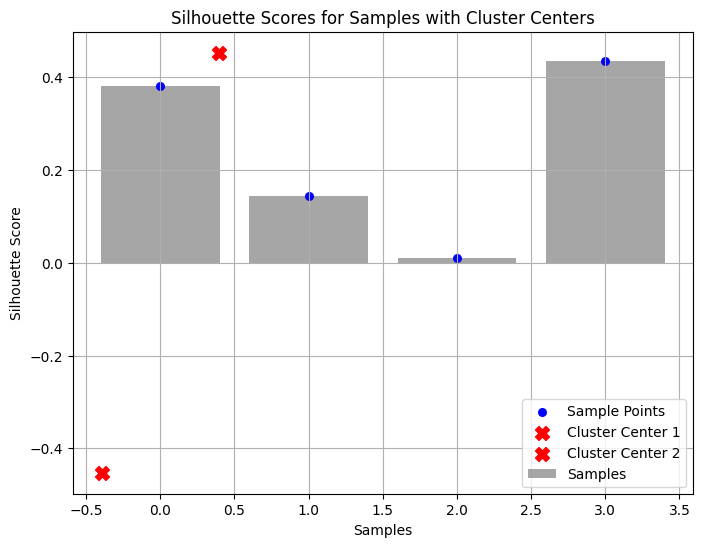

In [ ]:
########################################## Part Seven: Now we calculate the sum of squared distances (SSD).
AG_centers, AG_assignments = AG_kmeans(AG_data_scaled, AG_optimal_k)  # Call the k-means function with the scaled data and optimal number of clusters
AG_ssd = AG_compute_ssd(AG_data_scaled, AG_centers, AG_assignments)  # Calculate the sum of squared distances using the computed centers and assignments
print('Sum of squared Euclidean distances:', AG_ssd)  # Print the SSD value

########################################### Part Eight: Plot the Silhouette Scores and Cluster Centers
# Calculate silhouette scores for each sample
from sklearn.metrics import silhouette_samples
# Get silhouette scores for each sample
AG_sample_silhouette_scores = silhouette_samples(AG_data_scaled, AG_assignments)
# Plot silhouette scores for each sample
plt.figure(figsize=(8, 6))
plt.bar(range(len(AG_sample_silhouette_scores)), AG_sample_silhouette_scores, color='gray', alpha=0.7, label='Samples')
plt.scatter(range(len(AG_sample_silhouette_scores)), AG_sample_silhouette_scores, color='blue', s=30, marker='o', label='Sample Points')
# Add cluster centers to the plot
for i, center in enumerate(AG_centers):
    plt.scatter(center[0], center[1], color='red', s=100, marker='X', label=f'Cluster Center {i + 1}')  # For 2D case, you can adjust as needed
plt.title('Silhouette Scores for Samples with Cluster Centers')
plt.xlabel('Samples')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()


